In [1]:
import argparse
import numpy as np
import tensorflow as tf

/Users/silvio/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Epoch: 0001 cost= 1.183631450
Epoch: 0002 cost= 0.665174214
Epoch: 0003 cost= 0.552741422
Epoch: 0004 cost= 0.498651892
Epoch: 0005 cost= 0.465440046
Epoch: 0006 cost= 0.442512541
Epoch: 0007 cost= 0.425533369
Epoch: 0008 cost= 0.412152972
Epoch: 0009 cost= 0.401345279
Epoch: 0010 cost= 0.392377416
Epoch: 0011 cost= 0.384696628
Epoch: 0012 cost= 0.378211590
Epoch: 0013 cost= 0.372414057
Epoch: 0014 cost= 0.367267003
Epoch: 0015 cost= 0.362729646
Epoch: 0016 cost= 0.358655363
Epoch: 0017 cost= 0.354874410
Epoch: 0018 cost= 0.351398616
Epoch: 0019 cost= 0.348348144
Epoch: 0020 cost= 0.345399227
Epoch: 0021 cost= 0.342759999
Epoch: 0022 cost= 0.340259686
Epoch: 0023 cost= 0.337914683
Epoch: 0024 cost= 0.335735235
Epoch: 0025 cost= 0.333714133
Optimization Finished!
Accuracy: 0.9141


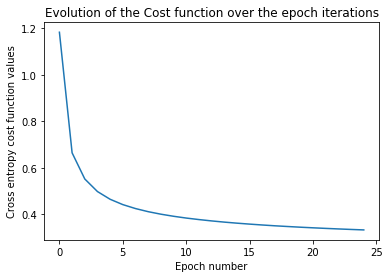

El digito detectado es:7 con probabilidad: 99.61 %


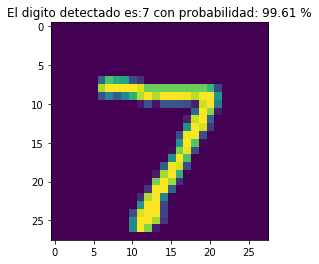

El digito detectado es:2 con probabilidad: 89.85 %


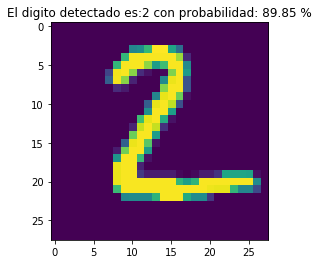

El digito detectado es:1 con probabilidad: 95.77 %


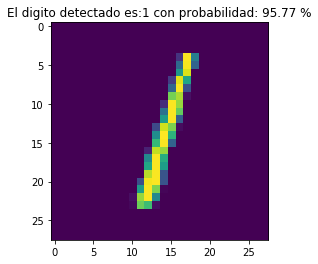

El digito detectado es:0 con probabilidad: 99.77 %


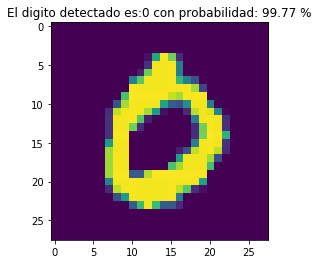

El digito detectado es:4 con probabilidad: 89.11 %


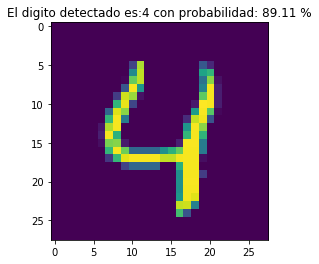

In [5]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784])  # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10])  # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b)  # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices=1))
epoch_costs = np.empty(0)
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch

        epoch_costs = np.append(epoch_costs, avg_cost)
        # Display logs per epoch step
        if (epoch + 1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch + 1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

    %matplotlib inline
    import matplotlib.pyplot as plt
    import numpy as np

    # Data for plotting
    t = np.arange(0, np.size(epoch_costs))

    fig, ax = plt.subplots()
    ax.plot(t, epoch_costs)

    ax.set(xlabel='Epoch number', ylabel='Cross entropy cost function values',
           title='Evolution of the Cost function over the epoch iterations')
    # ax.grid()

    #fig.savefig("test.png")
    plt.show()

    yy = pred.eval({x: mnist.test.images})

    for i in range(5):
        digit = np.argmax(yy[i], axis=0)
        title = "El digito detectado es:" + str(digit) + " con probabilidad: " + '{0:.2f} %'.format(yy[i, digit] * 100)
        print(title)
        plt.title(title)
        plt.imshow(np.array(mnist.test.images[i]).reshape((28, 28)) * 255)
        plt.show()

